In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test_images/Virat (5).png')
img.shape

(549, 486, 3)

Show Image

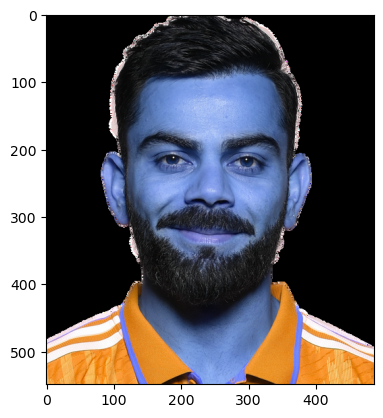

In [4]:
plt.imshow(img)
plt.show()

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(549, 486)

In [6]:
gray

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [167, 159, 152, ..., 137, 131, 135],
       [151, 156, 155, ..., 130, 132, 136],
       [155, 159, 159, ..., 129, 139, 134]], dtype=uint8)

Gray Image

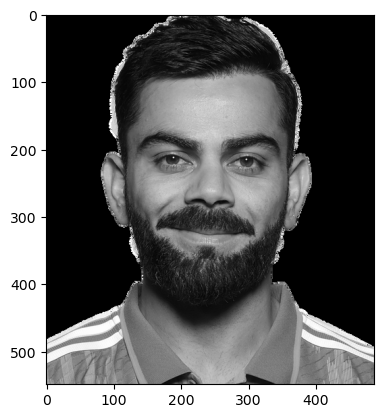

In [8]:
plt.imshow(gray, cmap='gray')
plt.show()

In [9]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 78,  88, 328, 328]], dtype=int32)

In [10]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(78), np.int32(88), np.int32(328), np.int32(328))

Image rectangle

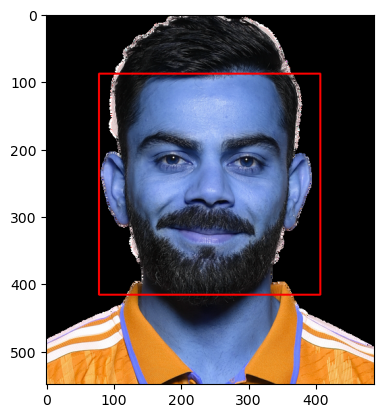

In [12]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)
plt.show()

Detect eyes and face

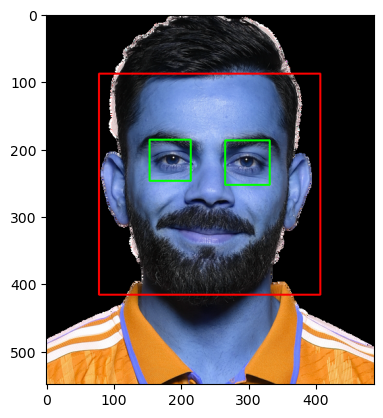

In [13]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

Crop facial region of image

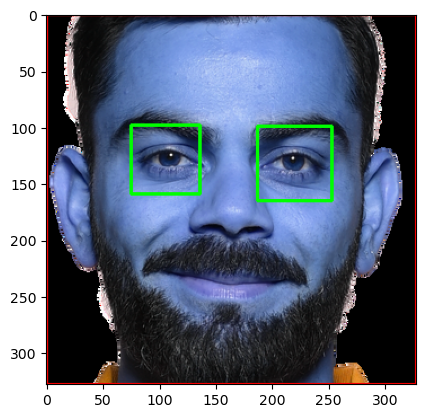

In [14]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')
plt.show()

In [15]:
cropped_img = np.array(roi_color)
cropped_img.shape

(328, 328, 3)

In [16]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

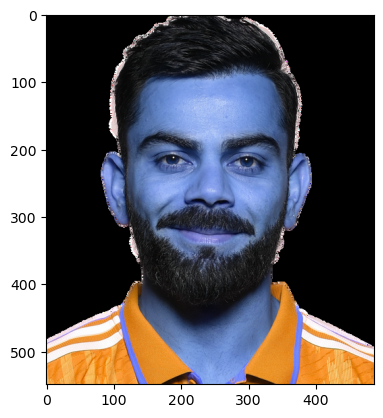

In [18]:
original_image = cv2.imread('./test_images/Virat (5).png')
plt.imshow(original_image)
plt.show()

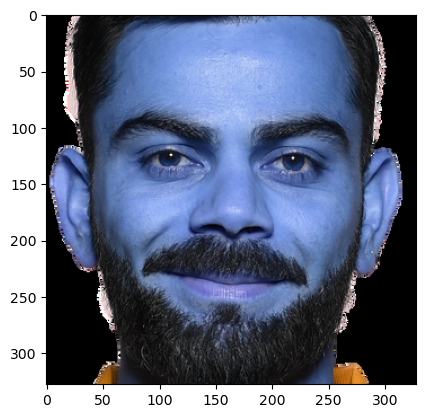

In [19]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/Virat (5).png')
plt.imshow(cropped_image)
plt.show()

In below image face is not very clear and it doesn't have two eyes clearly visible

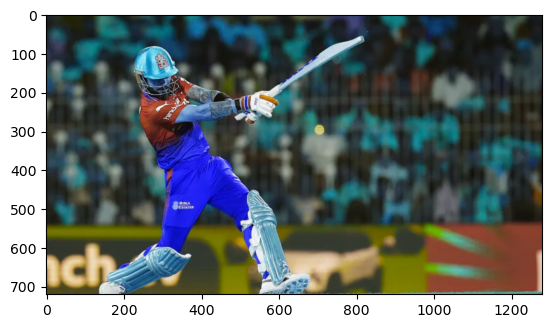

In [20]:
org_image_obstructed = cv2.imread('./test_images/Virat (46).png')
plt.imshow(org_image_obstructed)
plt.show()

In [21]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [22]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [23]:
img_dirs

['./dataset/Anushka Sen',
 './dataset/Lionel Messi',
 './dataset/Maria Sarapova',
 './dataset/Roman Reigns',
 './dataset/Virat Kohli']

Go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code

In [24]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [25]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/Anushka Sen
Generating cropped images in folder:  ./dataset/cropped/Lionel Messi
Generating cropped images in folder:  ./dataset/cropped/Maria Sarapova
Generating cropped images in folder:  ./dataset/cropped/Roman Reigns
Generating cropped images in folder:  ./dataset/cropped/Virat Kohli


Now you should have cropped folder under datasets folder that contains cropped images
Manually examine cropped folder and delete any unwanted images

In [26]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Anushka Sen': ['./dataset/cropped/Anushka Sen\\Anushka Sen1.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen10.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen11.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen12.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen13.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen14.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen15.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen16.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen17.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen18.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen19.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen20.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen21.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen22.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen23.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen24.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen25.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen26.png',
  './dataset/c

Wavelet Transform

In [27]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

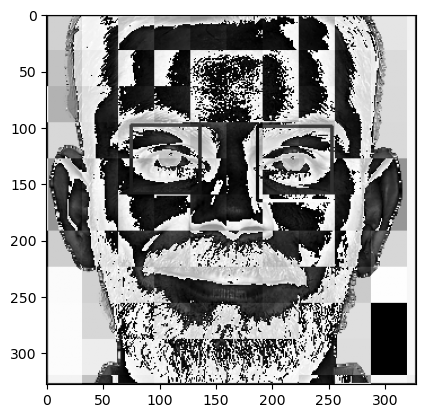

In [28]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')
plt.show()

In [29]:
celebrity_file_names_dict

{'Anushka Sen': ['./dataset/cropped/Anushka Sen\\Anushka Sen1.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen10.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen11.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen12.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen13.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen14.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen15.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen16.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen17.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen18.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen19.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen20.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen21.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen22.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen23.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen24.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen25.png',
  './dataset/cropped/Anushka Sen\\Anushka Sen26.png',
  './dataset/c

In [30]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Anushka Sen': 0,
 'Lionel Messi': 1,
 'Maria Sarapova': 2,
 'Roman Reigns': 3,
 'Virat Kohli': 4}

In [31]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])   

In [33]:
len(X)

216

In [34]:
X[0]

array([[  4],
       [  6],
       [ 14],
       ...,
       [235],
       [232],
       [232]], dtype=uint8)

In [35]:
y[0]

0

In [36]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(216, 4096)

In [37]:
X[0]

array([  4.,   6.,  14., ..., 235., 232., 232.])

### Training the model

We wiil use SVM with rbf kernel tuned with heuristic finetuning

In [38]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8148148148148148

In [40]:
len(X_test)

54

In [41]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        12
           1       0.75      1.00      0.86         9
           2       1.00      0.43      0.60         7
           3       1.00      0.67      0.80        15
           4       0.77      0.91      0.83        11

    accuracy                           0.81        54
   macro avg       0.85      0.80      0.79        54
weighted avg       0.86      0.81      0.80        54



Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [42]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [43]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [44]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in versio

,model,best_score,best_params
0,svm,0.826705,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.659280,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.851515,{'logisticregression__C': 5}


In [45]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, multi_class='auto',
                                     solver='liblinear'))])}

In [46]:
best_estimators['svm'].score(X_test,y_test)

0.8703703703703703

In [47]:
best_estimators['random_forest'].score(X_test,y_test)

0.6111111111111112

In [48]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8333333333333334

Best classifier

In [49]:
best_clf = best_estimators['svm']

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[12,  0,  0,  0,  0],
       [ 0,  8,  0,  1,  0],
       [ 2,  0,  5,  0,  0],
       [ 0,  2,  0, 12,  1],
       [ 0,  0,  0,  1, 10]])

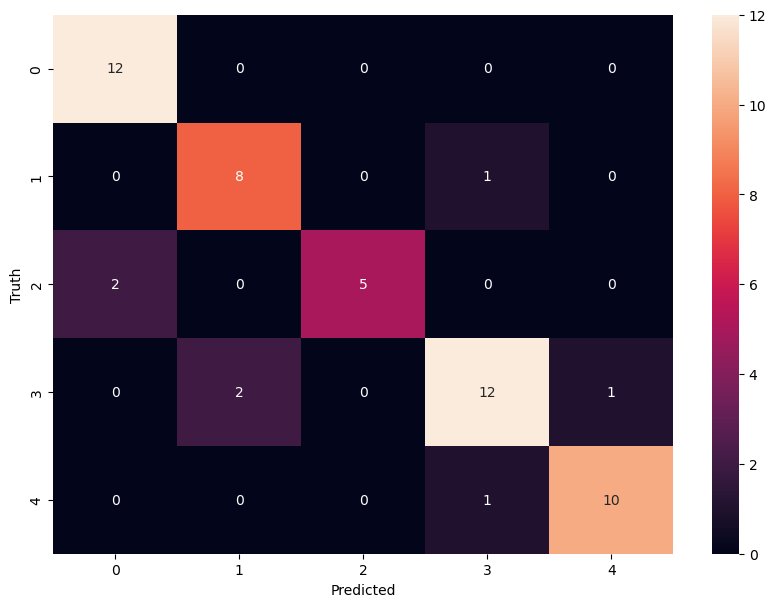

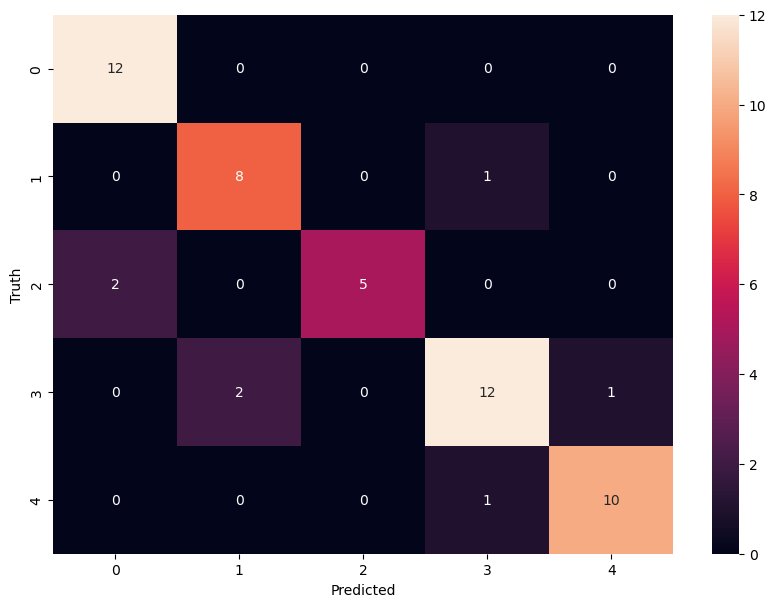

In [52]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [53]:
class_dict

{'Anushka Sen': 0,
 'Lionel Messi': 1,
 'Maria Sarapova': 2,
 'Roman Reigns': 3,
 'Virat Kohli': 4}

Save model

In [55]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

Save class dictionary

In [56]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))